# Tidal Evolution of the Earth-Moon System

### Patricia Golaszewska 

In [30]:
# The following packages will be used:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
import math

%matplotlib inline
plt.style.use('dark_background')
from scipy.integrate import ode

## 1. 

Here, we pick our unit system. 

Because the majority of the quanitities presented in this set are given in cgs, we'll use that as our primary unit system. The other quantities will then be converted, accordingly.

Gravitational constant: $G$ = $ 6.67 {\times} 10^{-8} g^{-1} cm^{3} s^{-2}$


Solar mass: $M_{\odot}$ = $1.98 {\times} 10^{33} g$

Earth Mass: $M_{\oplus}$ = $5.97 {\times} 10^{27} g$
 
Lunar mass: $m_{moon}$ = $7.349 {\times} 10^{25} g$

Earth's radius: $R_{\oplus}$ = $6,371 km$ = $637,100,000 cm$


Present day Lunar semimajor axis: $a_{moon}(0)$ = $384,000 km$ = $3.84 {\times} 10^{10} cm$


Semimajor axis of Earth's orbit: $a_{\oplus}$ = $1.49 {\times} 10^{8} km$ = $1.49 {\times} 10^{13} cm$

Love number of Earth: $k_{2}$ = $0.298$ (dimensionless)

Tidal quality factor: $Q_{moon} $ = $11.5$ (dimensionless)


 

Because we're working with an initial value problem, we need to set our intiial conditions. Thus, we'll proceed by calculating $L_{\oplus}$, $S_{\oplus}$, and $L_{moon}$.


Those quantities are given by the following equations:

$L_{\oplus}$ = $M_{\oplus} \sqrt{G(M_{\odot} + M_{\oplus})a_{\oplus}}$

$S_{\oplus}$ = $I{\Omega}_{\oplus}$

where $I$ = $0.3299 M_{\oplus}R^{2}_{\oplus}$

and ${\Omega}_{\oplus}$ = $\frac{2 \pi}{lod}$

where $lod$ = $86164 s$

$L_{moon}$ = $m_{moon} \sqrt{G(M_{\oplus} + m_{moon})a_{moon}}$

Then performing the calculations:

$L_{\oplus}$ = $M_{\oplus} \sqrt{G(M_{\odot} + M_{\oplus})a_{\oplus}}$

$L_{\oplus}$ = $(5.97 {\times} 10^{27} g) \sqrt{(6.67 {\times} 10^{-8} g^{-1} cm^{3} s^{-2})(1.98 {\times} 10^{33} g + (5.97 {\times} 10^{27} g))(1.49 {\times} 10^{13} cm)}$

$L_{\oplus}$ = $2.648 {\times} 10^{47} g cm^{2} s^{-1}$

Then the next:

$S_{\oplus}$ = $I{\Omega}_{\oplus}$

$S_{\oplus}$ = $0.3299 M_{\oplus}R^{2}_{\oplus} \frac{2 \pi}{lod}$

$S_{\oplus}$ = $0.3299(5.97 {\times} 10^{27} g)(637,100,000 cm)^{2} \frac{2 \pi}{86164 s}$

$S_{\oplus}$ = $5.829 {\times} 10^{40} gcm^{2}s^{-1}$


And the final computation:

$L_{moon}$ = $m_{moon} \sqrt{G(M_{\oplus} + m_{moon})a_{moon}}$

$L_{moon}$ = $(7.349 {\times} 10^{25} g) \sqrt{( 6.67 {\times} 10^{-8} g^{-1} cm^{3} s^{-2})((5.97 {\times} 10^{27} g) + (7.349 {\times} 10^{25} g))(3.84 {\times} 10^{10} cm)}$

$L_{moon}$ = $2.891 {\times} 10^{41} g cm^{2} s^{-1}$

In [31]:
# Define variables

G = 6.67e-8
M_Earth = 5.97e27
M_Sun = 1.98e33
m_moon = 7.349e25
R_Earth = 6.371e8
a_moon0 = 3.84e10
a_Earth = 1.49e13
lod = 86164
I = 0.3299*M_Earth*R_Earth**2



In [32]:
# Earth Orbital Angular Momentum
L_Earth0 = (M_Earth)*((G)*((M_Sun) + (M_Earth))*(a_Earth))**0.5

L_Earth0

2.6482783623404096e+47

In [33]:
# Earth Angular Momentum
S_Earth0 = I*(2*np.pi/lod)

S_Earth0

5.829427067103106e+40

In [34]:
# Lunar Orbital Angular Momentum
L_moon0 = (m_moon)*((G)*((M_Earth) + (m_moon))*(a_moon0))**0.5

L_moon0

2.8913500926978634e+41

## 2.

Here, we will give the present day values of $T_{moon}$ and $T_{\odot}$.


There is a simple tidal model which computes the Lundar tidal torque:


$T_{moon}$ = $\frac{3}{2} \frac{G m^{2}_{moon}}{a_{moon}}(\frac{R_{\oplus}}{a_{moon}})^{5} \frac{k_{2}}{Q_{moon}}$

In [35]:
k_2 = 0.298
Q_moon = 11.5

In [36]:
T_moon0 = (3/2)*(G*m_moon**2/a_moon0)*(R_Earth/a_moon0)**5*(k_2/Q_moon)

T_moon0

4.583979752290667e+23

$T_{moon}$ and $T_{\odot}$ are related through the ratio $\beta$

$\frac{T_{\odot}}{T_{moon}}$ = $\beta$

So that $T_{\odot}$ = $\beta T_{moon}$

In [37]:
B = 1/4.7

T_Sun0 = B*T_moon0

T_Sun0

9.753148409129078e+22

Where both values have units of $\frac{cm^{4}}{gs^{2}}$

## 3.

Here, we'll calculate the three timescales associated with equations (1) through (3) in the project outline.

$\tau_{L_{\oplus}}$ = $\frac{L_{\oplus}}{T_{\odot}}$


$\tau_{S_{\oplus}}$ = $\frac{S_{\oplus}}{T_{\odot} + T_{moon}}$

$\tau_{L_{moon}}$ = $\frac{L_{moon}}{T_{moon}}$


The timescale $\tau_{L_{\oplus}}$ in years:

In [38]:
# First in seconds

tau_L_S = L_Earth0/T_Sun0


# Then converted to years
year_tau_L_S = tau_L_S / 60 / 60 / 24 / 365.25

year_tau_L_S

8.604285896366192e+16

Then the timescale $\tau_{S_{\oplus}}$ in years:

In [39]:
# First in seconds

tau_S_S = S_Earth0/(T_Sun0 + T_moon0)


# Then converted to years
year_tau_S_S = tau_S_S / 60 / 60 / 24 / 365.25

year_tau_S_S

3322784819.384658

And last, the timescale $\tau_{L_{moon}}$:

In [40]:
tau_L_m = L_moon0/T_moon0

# Then converted to years
year_tau_L_m = tau_L_m / 60 / 60 / 24 / 365.25

year_tau_L_m

19987295012.096508

## 4.


In this problem, we are tasked with writing a function to evaluate the right hand side of the differential equations we've been provided. 

Prior to that, we need to define auxiliary functions for the lunar and solar torque. 

In [41]:
# bringing back the constants from earlier 

G = 6.67e-8
M_Earth = 5.97e27
M_Sun = 1.98e33
m_moon = 7.349e25
R_Earth = 6.371e8
a_moon0 = 3.84e10
a_Earth = 1.49e13
lod = 86164
I = 0.3299
k_2 = 0.298
Q_moon = 11.5

L_Earth0 = (M_Earth)*((G)*((M_Sun) + (M_Earth))*(a_Earth))**0.5
S_Earth0 = I*M_Earth*R_Earth**2*(2*np.pi/lod)
L_moon0 = (m_moon)*((G)*((M_Earth) + (m_moon))*(a_moon0))**0.5

# First defining the functions we need to feed in our evolution equation

# Lunar torque
def T_moon(a_moon):
    T_m = (3/2) * ((G*m_moon**2)/a_moon) * (R_Earth/a_moon)**5 * (k_2/Q_moon)
    return T_m

# Solar torque
def T_Sun(a_moon):
    T_S = (1/4.7) * (a_moon/a_moon0)**6 * T_moon(a_moon)
    return T_S
     

# Write out the system of equations

def evolution(t, X):
    L_Earth, S_Earth, L_moon = X
    a_moon = (L_moon/m_moon)**2 / (G*(M_Earth+m_moon))
    f = [T_Sun(a_moon), -T_Sun(a_moon) - T_moon(a_moon) , T_moon(a_moon)]
    return f

## 5.

From the step above, we're now going to integrate and store our solution. 

We're integrating backwards in time, until the Moon hits Earth.



In [42]:
# Choose solver
solver = ode(evolution)
solver.set_integrator('dopri5')


# Set the initial conditions
t0 = 0.0
X0 = [L_Earth0, S_Earth0, L_moon0]
# These intial conditions were provided in the assignment and calculated earlier
solver.set_initial_value(X0, t0)


# Integrating back in time
t1 = -5.0e16 # seconds

# Step size (larger values presented issues)
N = 250

t = np.linspace(t0, t1, N)
sol = np.empty((N, 3))

# Create an empty array to store the solution
sol[0] = X0

# Setting up our counter
i = 1
while solver.successful() and solver.t > t1:
    solver.integrate(t[i])
    sol[i] = solver.y
    i += 1

# Defining the semimajor axis equation in kilometers
a_moon_km = (sol[:,2]/m_moon)**2 / (G*(M_Earth + m_moon)) / 100000    

# Then to find when the Earth and Moon are in contact

np.where(a_moon_km == 0)[0][0]


C:\Users\patri\Anaconda3\lib\site-packages\scipy\integrate\_ode.py:1179: UserWarning: dopri5: step size becomes too small
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


243

In [43]:
# First converting to billions of years
t_years = t / 60 / 60 / 24 / 365.25 / 1e9

# Then finding the time when the Moon and Earth are in contact
# using the index we found
t_years[243]

-1.5462259716484004

Thus, the Moon formed about 1.546 billion years ago, according to this model.

## 6.

Here, we're asked to plot the function of the Moon's semimajor axis over time. The solution from above is used.

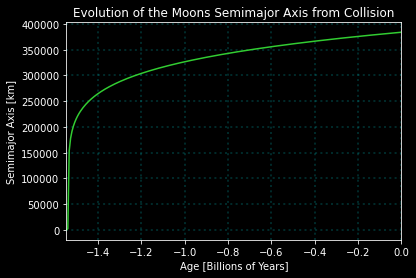

In [44]:
# Plotting our solution

plt.plot(t_years, a_moon_km , label='Semimajor axis', color = 'limegreen')
plt.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel('Age [Billions of Years]')
plt.ylabel('Semimajor Axis [km]')
plt.title('Evolution of the Moons Semimajor Axis from Collision')
plt.xlim([t_years[243], 0]) # Limiting from the time of contact and the present
plt.savefig("Q6.pdf", dpi=300, bbox_inches='tight')
plt.show()

## 7.

Here, we plot the length of a day versus age. 

In order to obtain the equation used, we rearrange equation 7 and contrast present and past values.

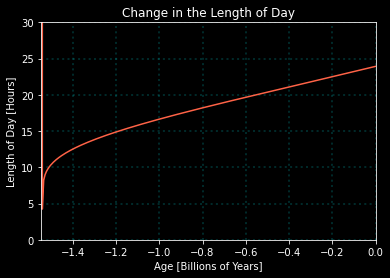

In [45]:
# Plotting our solution
lod_then = (86164 / 60 / 60)*S_Earth0/(sol[:,1])

plt.plot(t_years, lod_then, label='Semimajor axis', color = 'tomato')
plt.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel('Age [Billions of Years]')
plt.ylabel('Length of Day [Hours]')
plt.title('Change in the Length of Day')
plt.xlim([t_years[243], 0])
plt.ylim([0,30])
plt.savefig("Q7.pdf", dpi=300, bbox_inches='tight')
plt.show()

## 8.

Assuming the moon is a rigid object, it is reported to have a Roche limit of 9496km.

Value obtained from: https://www.cs.mcgill.ca/~rwest/wikispeedia/wpcd/wp/r/Roche_limit.htm

We want to find the length of the day at the time of the Moon's formation if it formed from this radius.

In order to do this, we need to find the index at which we have this radius.

In [46]:
np.where(a_moon_km <= 9496)[0][0]

242

In [47]:
lod_then[242]

4.239113249639029

Thus, the length of day was slighly more than 4 hours at the Roche radius.

## 9.

The age of the moon has been reported to be approximately 4.425 billion years (via: https://www.cnn.com/2020/07/16/world/moon-85-million-years-younger-scn-trnd/index.html) whereas the Earth is believed to be approximately 4.54 billion years old (via: https://www.nationalgeographic.org/topics/resource-library-age-earth/?q=&page=1&per_page=25)


These values are vastly different than those dictated by the tidal equations in the project.

## 10.

Here, we've been asked to discuss possible errors in our model.



Issues surrounding this model arise from the incorrect age we get for our system. I suspect that there may be issues with how our model predicts the evolution of this system, and possibly doesn't account for the conditions at impact.

Firstly, I do not believe that this model allows for the moon to go through the process of mass accretion. This process would change the dynamics of the system over time as the gravitational effects change.

Second, I believe that this model assumes that the Earth-Moon system has been tidally locked from impact. This is an extension of the point made above; the dynamics of this system age the Earth-Moon system based on the tidal evolution. However, if the moon spent a period of time in asynchronous rotation, this model doesn't capture this.

I believe that this model interprets the collision as formation, which isn't necessarily true. The moon would have began it's formation at some distance away (i.e possibly the Roche radius) versus at impact.

Additional inconsistencies may be caused by changes in the eccentricity and alignment of the moons orbit, as well as external gravitational influences. Stabilization and tidal-locking may also result in changes in the energy in this system, which could have influenced the evolution of our system. 

These reasons are listed in the order of what I assume to be the most reasonable assumption. My primary concern is that the initial dynamics of the system differ than those observed today, and they are not accounted for in the scope of this project.